Importing the Dependencies

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

ModuleNotFoundError: No module named 'sklearn'

Data Collection and Analysis

In [10]:
# loading the data from csv file to a Pandas Dataframe
insurance = pd.read_csv('/Documents/insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Documents/insurance.csv'

In [ ]:
# first 5 rows of the dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# getting information about the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [21]:
# Check if there is NULL data
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [22]:
# Statistical measures of dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


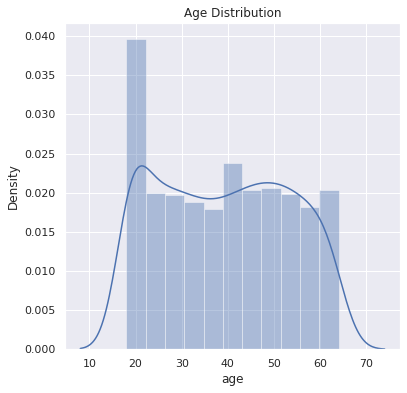

In [23]:
# distribution of age value
sb.set()
plt.figure(figsize=(6, 6))
sb.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

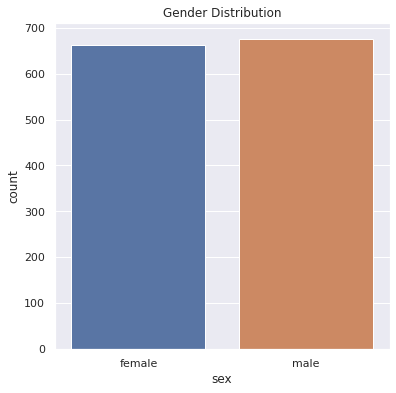

In [24]:
# Distribution of gender column
plt.figure(figsize=(6, 6))
sb.countplot(x='sex', data=insurance)
plt.title('Gender Distribution')
plt.show()

In [25]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Encoding the Categorical Features

In [26]:
# encoding sex column
# insurance['sex'] = insurance['sex'].apply({'male':0, 'female':1}.get)
insurance.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column
# insurance['smoker'] = insurance['smoker'].apply({'yes':0, 'no':1}.get)
insurance.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column
# insurance['region'] = insurance['region'].apply({'southeast':0, 'southwest':1, 'northeast':3, 'northwest':4}.get)
insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Coorelation between different columns

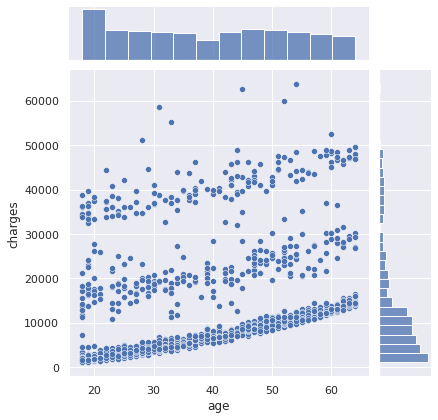

In [27]:
sb.jointplot(x=insurance['age'], y=insurance['charges'])

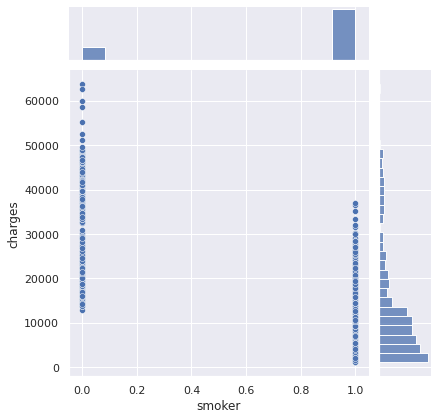

In [28]:
sb.jointplot(x=insurance['smoker'], y=insurance['charges'])

Splitting the Features and Target

In [29]:
X = insurance.drop(columns='charges', axis=1)
Y = insurance['charges']

In [30]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting data into Training data and Testing data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [34]:
# loading the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [35]:
# prediction from model on training data
training_predictions = model.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_predictions) # Values predicted and original
print(r2_train)

0.751505643411174


In [36]:
# prediction from model on testing data
predictions = model.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, predictions) # Values predicted and original
print(r2_test)

0.7447273869684077


Text(0, 0.5, 'Predicted Y')

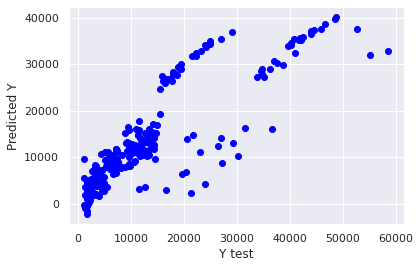

In [38]:
# comparing the results
plt.scatter(Y_test, predictions,c='blue')
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

Building a System

In [39]:
input = (31, 1, 25.74, 0, 1, 0)
input_data = np.asarray(input).reshape(1, -1)
predicted_value = model.predict(input_data)
print(predicted_value)
print('Thus the amount will be ', predicted_value[0])

[3760.0805765]
Thus the amount will be  3760.0805764960587


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
